<a href="https://colab.research.google.com/github/twice1st/Detecting-and-Beautifying-Vietnamese-Faces/blob/main/Source%20code/Classification_CustomModel_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import pickle

# Đọc file Vector embedding

In [ ]:
def _save_pickle(obj, file_path):
  with open(file_path, 'wb') as f:
    pickle.dump(obj, f)

def _load_pickle(file_path):
  with open(file_path, 'rb') as f:
    obj = pickle.load(f)
  return obj

In [ ]:
embedding_sm1 = _load_pickle("/content/drive/MyDrive/CS231/file/Trong/embed_blob_faces_sm1.pkl")
embedding_sm2 = _load_pickle("/content/drive/MyDrive/CS231/file/Trong/embed_blob_faces_sm2.pkl")
embedding_v2 = _load_pickle("/content/drive/MyDrive/CS231/file/Trong/embed_blob_faces_v2.pkl")
embedding_sm1_1= _load_pickle("/content/drive/MyDrive/CS231/file/Trong/embed_blob_faces_sm1_no_processing.pkl")
embedding_sm2_1= _load_pickle("/content/drive/MyDrive/CS231/file/Trong/embed_blob_faces_sm2_no_processing.pkl")
embedding_v2_1= _load_pickle("/content/drive/MyDrive/CS231/file/Trong/embed_blob_faces_v2_no_processing.pkl")
labels =  _load_pickle("/content/drive/MyDrive/CS231/file/Trong/labels.pkl")

In [ ]:
path =_load_pickle("/content/drive/MyDrive/CS231/file/Trong/images_file.pkl")

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

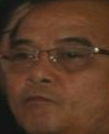

In [ ]:
img= cv2.imread(path[2],cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
train_ids =  _load_pickle("/content/drive/MyDrive/CS231/file/Trong/id_train.pkl")
test_ids = _load_pickle("/content/drive/MyDrive/CS231/file/Trong/id_test.pkl")

# Tiền xử lý dữ liệu 

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler= StandardScaler()
X = np.array(embedding)
X=X.reshape(19589,1*128)
X = scaler.fit_transform(X)

In [ ]:
def preprocess(embedding, labels):
    X = np.array(embedding)
    X=X.reshape(19589,1*128)
    X = scaler.fit_transform(X)
    y= np.array(labels)
    y = y.astype(np.int)
    X_train= [ X[i] for i in train_ids]
    y_train= [ y[i] for i in train_ids]
    X_test = [ X[i] for i in test_ids]
    y_test = [ y[i] for i in test_ids]
    X_train,y_train,X_test,y_test = np.array(X_train), np.array(y_train),np.array(X_test),np.array(y_test)
    return X_train,y_train,X_test,y_test

# Xây dựng mạng neural network đơn giản với 2 lớp ẩn

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
def create_model():
	model = Sequential()
	model.add(Dense(10, input_dim=128, activation='relu'))
	model.add(Dense(5, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# Huấn luyện, đánh giá 

In [ ]:
class_names= ["Other","Vietnamese"]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
def draw_cf_matrix(cf_matrix, class_names):
    df_cm = pd.DataFrame(cf_matrix, index = [i for i in class_names],
                    columns = [i for i in class_names])
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True,fmt='g')

In [ ]:
def process(embedding, labels):
    X_train,y_train,X_test,y_test= preprocess(embedding, labels)
    model = create_model()
    model.summary()
    history= model.fit(x=X_train, y=y_train, epochs=50, batch_size=64, verbose=1)
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    y_pred= y_pred.reshape(y_pred.shape[0])

    y_pred = y_pred.astype('str')
    for i in range(len(y_pred)):
        y_pred[i] = class_names[int(y_pred[i])]

    y_test = y_test.astype('str')
    for i in range (len(y_test)):
        if y_test[i]=='0':
            y_test[i]="Other"
        else:
            y_test[i]="Vietnamese"
    
    print('Classification Report')
    print(classification_report(y_test, y_pred, target_names=class_names))  
    
    cf_matrix = confusion_matrix(y_test, y_pred)
    draw_cf_matrix(cf_matrix, class_names)

# Huấn luyện và đánh giá với hình ảnh đã qua tiền xử lý

## Kết quả trên nn4.small2.v1

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,351
Trainable params: 1,351
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
245/245 [==============================] - 1s 2ms/step - loss: 0.4986 - accuracy: 0.7625
Epoch 2/50
245/245 [==============================] - 0s 2ms/step - loss: 0.4532 - accuracy: 0.7933
Epoch 3/50
245/245 [==============================] - 1s 2ms/step - loss: 0.4463 - accuracy: 0.7971
Epoch 4/50
245/2

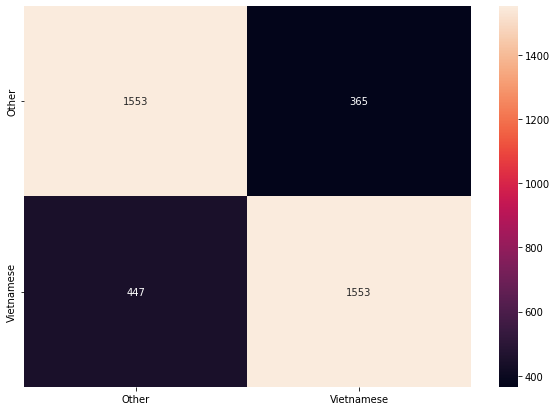

In [ ]:
process(embedding_sm1,labels)

## Kết quả trên nn4.small2.v2

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
 dense_7 (Dense)             (None, 5)                 55        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,351
Trainable params: 1,351
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
245/245 [==============================] - 1s 3ms/step - loss: 0.5924 - accuracy: 0.7352
Epoch 2/50
245/245 [==============================] - 1s 3ms/step - loss: 0.4761 - accuracy: 0.7932
Epoch 3/50
245/245 [==============================] - 1s 3ms/step - loss: 0.4440 - accuracy: 0.8032
Epoch 4/50
245/2

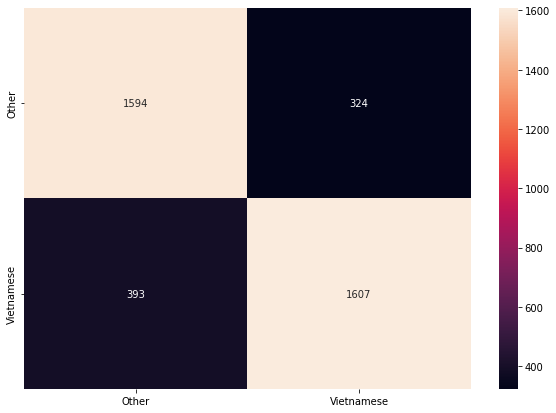

In [ ]:
process(embedding_sm2,labels)

## Kết quả trên nn4.v2

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
 dense_22 (Dense)            (None, 5)                 55        
                                                                 
 dense_23 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1,351
Trainable params: 1,351
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
245/245 [==============================] - 2s 2ms/step - loss: 0.5920 - accuracy: 0.6853
Epoch 2/50
245/245 [==============================] - 0s 2ms/step - loss: 0.5189 - accuracy: 0.7500
Epoch 3/50
245/245 [==============================] - 1s 2ms/step - loss: 0.5075 - accuracy: 0.7530
Epoch 4/50
245/2

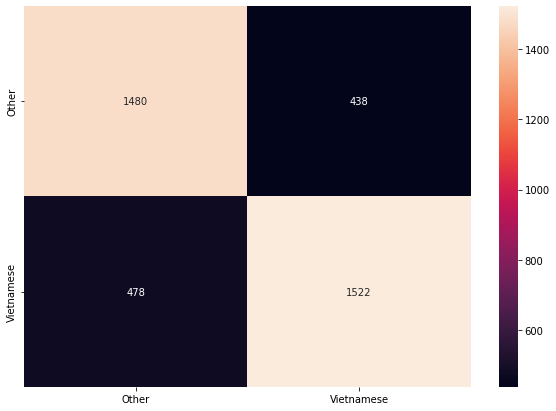

In [ ]:
process(embedding_v2,labels)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
 dense_5 (Dense)             (None, 5)                 55        
                                                                 
 dense_6 (Dense)             (None, 3)                 18        
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 1,367
Trainable params: 1,367
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
245/245 [==============================] - 2s 3ms/step - loss: 0.6836 - accuracy: 0.5739
Epoch 2/50
245/245 [==============================] - 1s 3ms/step - loss: 0.6687 - a

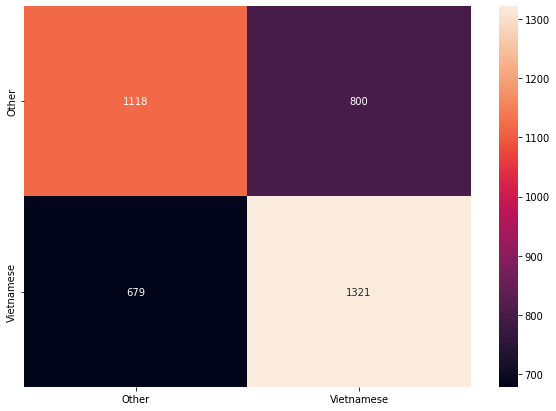

In [ ]:
process(embedding_sm1_1,labels)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
 dense_9 (Dense)             (None, 5)                 55        
                                                                 
 dense_10 (Dense)            (None, 3)                 18        
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
Total params: 1,367
Trainable params: 1,367
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
245/245 [==============================] - 1s 2ms/step - loss: 0.6793 - accuracy: 0.5816
Epoch 2/50
245/245 [==============================] - 0s 2ms/step - loss: 0.6628 - a

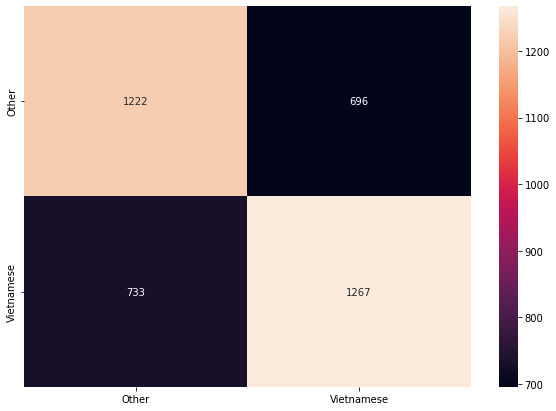

In [ ]:
process(embedding_sm2_1,labels)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
 dense_13 (Dense)            (None, 5)                 55        
                                                                 
 dense_14 (Dense)            (None, 3)                 18        
                                                                 
 dense_15 (Dense)            (None, 1)                 4         
                                                                 
Total params: 1,367
Trainable params: 1,367
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
245/245 [==============================] - 2s 3ms/step - loss: 0.6764 - accuracy: 0.5735
Epoch 2/50
245/245 [==============================] - 1s 3ms/step - loss: 0.6621 - a

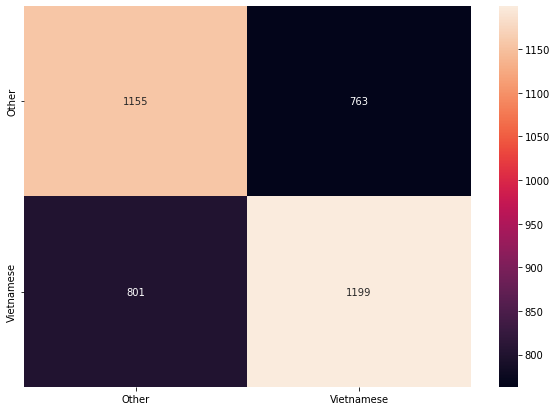

In [ ]:
process(embedding_v2_1,labels)

#Huấn luyện và đánh giá với hình ảnh chưa qua tiền xử lý

## Kết quả trên nn4.small2.v1

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
 dense_10 (Dense)            (None, 5)                 55        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1,351
Trainable params: 1,351
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
245/245 [==============================] - 1s 2ms/step - loss: 0.6809 - accuracy: 0.5797
Epoch 2/50
245/245 [==============================] - 1s 2ms/step - loss: 0.6530 - accuracy: 0.6121
Epoch 3/50
245/245 [==============================] - 1s 2ms/step - loss: 0.6459 - accuracy: 0.6195
Epoch 4/50
245/2

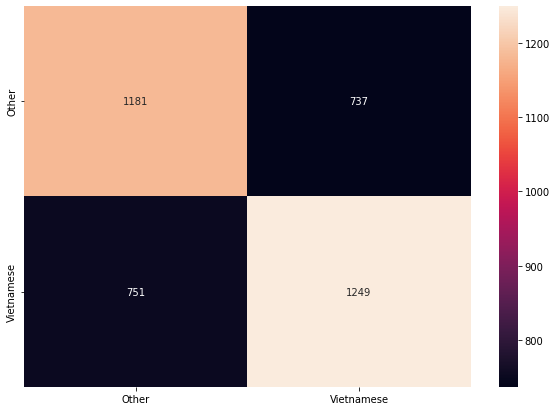

In [ ]:
process(embedding_sm1_1,labels)

## Kết quả trên nn4.small2.v2

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
 dense_13 (Dense)            (None, 5)                 55        
                                                                 
 dense_14 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1,351
Trainable params: 1,351
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
245/245 [==============================] - 1s 2ms/step - loss: 0.6761 - accuracy: 0.5670
Epoch 2/50
245/245 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.6211
Epoch 3/50
245/245 [==============================] - 0s 2ms/step - loss: 0.6373 - accuracy: 0.6339
Epoch 4/50
245/2

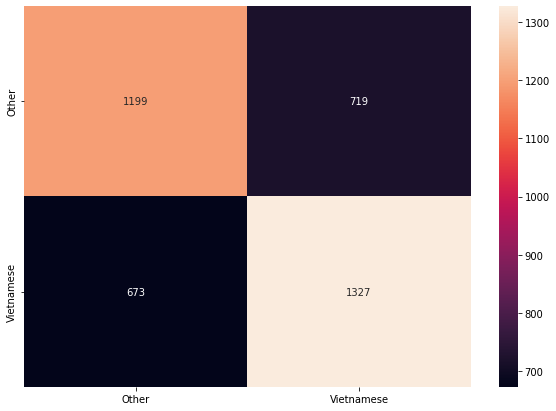

In [ ]:
process(embedding_sm2_1,labels)

##Kết quả trên nn4.v2

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
 dense_16 (Dense)            (None, 5)                 55        
                                                                 
 dense_17 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1,351
Trainable params: 1,351
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
245/245 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.5310
Epoch 2/50
245/245 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.5931
Epoch 3/50
245/245 [==============================] - 0s 2ms/step - loss: 0.6580 - accuracy: 0.6034
Epoch 4/50
245/2

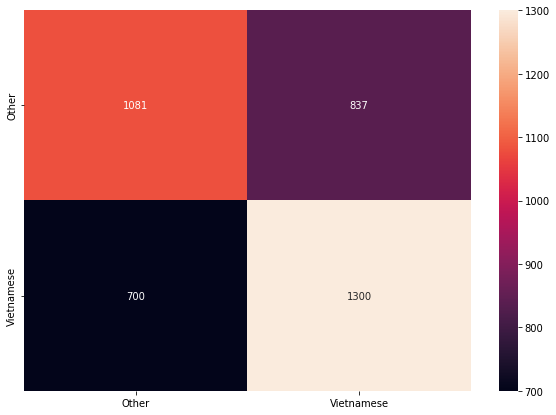

In [ ]:
process(embedding_v2_1,labels)